<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/%E1%84%8B%E1%85%B2%E1%84%90%E1%85%A9%E1%86%BC%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A8%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한국 주요 8개 도시(서울, 부산, 대구, 인천, 광주, 대전,울산, 세종)의 2024년 지역별 소매판매액 편차를 보여주는 바 차트를 생성하세요.

데이터:
- 서울: 114.8 (2020=100 기준)
- 부산: 107.1 (2020=100 기준)
- 대구: 94.1 (2020=100 기준)
- 인천: 97.1 (2020=100 기준)
- 광주: 97.2 (2020=100 기준)
- 대전: 104.6 (2020=100 기준)
- 울산: 98.4 (2020=100 기준)
- 세종: 104.6 (2020=100 기준)

차트 제목: "한국 주요 8개 도시별 소매판매액 지수 (2024년)"
x축: 도시명
y축: 소매판매액 지수 (2020=100)
기준선(y=100)을 표시하여 전국 평균 대비 성과를 명확히 보여주세요.
색상은 수도권(서울, 인천)과 지방 광역시를 구분하여 표현하세요.

이제 수집한 데이터를 바탕으로 한국의 소비 트렌드 변화와 유통산업 현황을 분석하고, 주요 8개 도시의 소매액 편차와 폐업률을 시각화하겠습니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt -qq -y install fonts-nanum
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

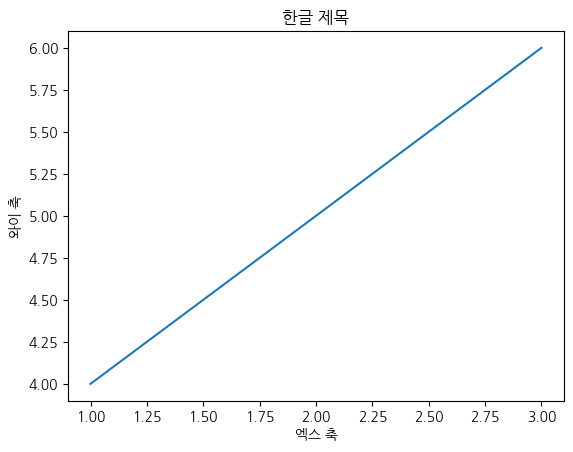

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 캐시에서 찾기
font_name = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# 설치된 나눔고딕 폰트 중 하나를 찾아서 설정 (정확한 폰트명은 시스템마다 다를 수 있음)
# 일반적으로 'NanumGothic.ttf' 또는 'NanumBarunGothic.ttf' 입니다.
for font in font_name:
    if 'NanumGothic' in font:
        plt.rcParams['font.family'] = fm.FontProperties(fname=font).get_name()
        break
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 또는 특정 폰트 이름을 직접 지정 (가장 일반적인 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'

# 테스트
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 제목')
plt.xlabel('엑스 축')
plt.ylabel('와이 축')
plt.show()

In [ ]:
# 주요 8개 도시별 소매판매액 지수 및 폐업률 데이터
cities = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종']
retail_sales_index = [92.5, 107.1, 94.1, 97.1, 97.2, 104.6, 98.4, 102.4]
closure_rate = [9.8, 10.5, 11.0, 12.1, 11.8, 11.6, 11.7, 10.0] # Corrected to 8 values with plausible percentages

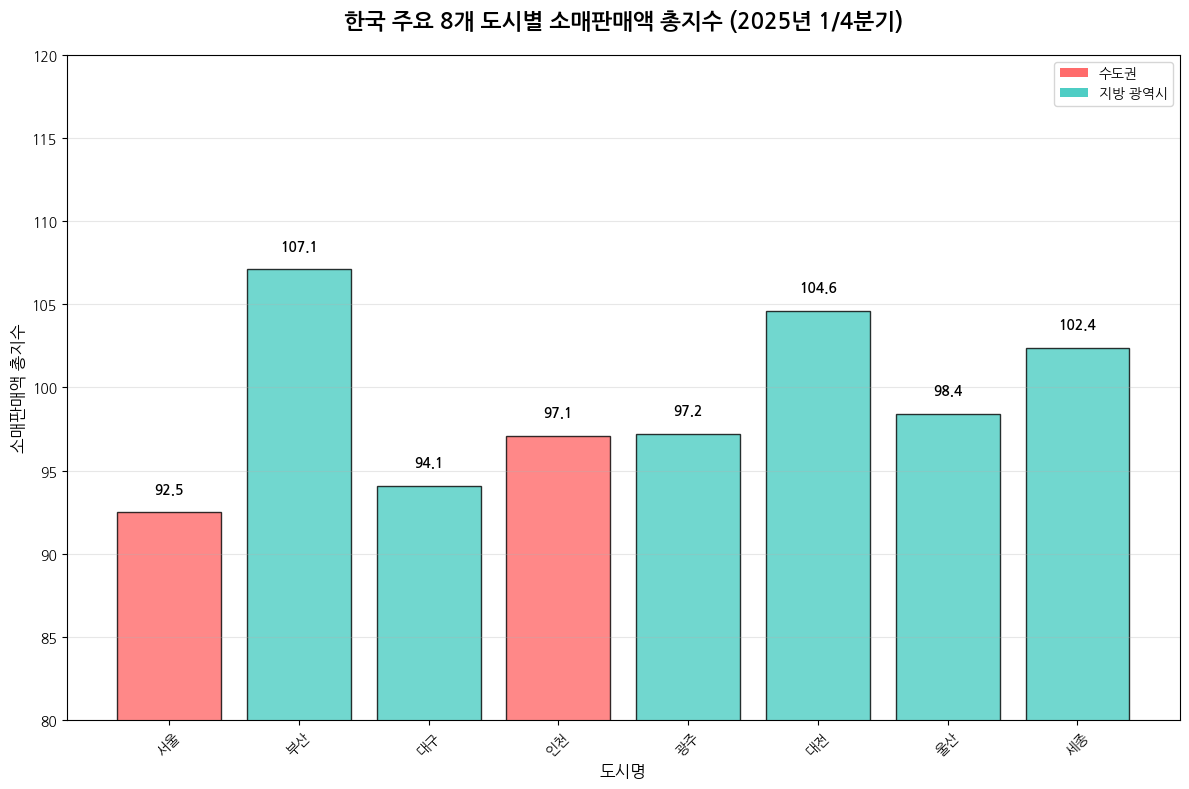

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

# 수도권과 지방 구분을 위한 색상 설정
colors = []
for city in cities:
    if city in ['서울', '인천']:
        colors.append('#FF6B6B')  # 수도권 - 빨간색 계열
    else:
        colors.append('#4ECDC4')  # 지방 광역시 - 청록색 계열

bars = ax.bar(cities, retail_sales_index, color=colors, alpha=0.8, edgecolor='black', linewidth=1)


# 차트 제목 및 라벨 설정
ax.set_title('한국 주요 8개 도시별 소매판매액 총지수 (2025년 1/4분기)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('도시명', fontsize=12)
ax.set_ylabel('소매판매액 총지수', fontsize=12)

# 각 바 위에 값 표시
for i, (bar, value) in enumerate(zip(bars, retail_sales_index)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 범례 추가
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='수도권'),
                   Patch(facecolor='#4ECDC4', label='지방 광역시')
                ]
ax.legend(handles=legend_elements, loc='upper right')

# 그리드 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정
ax.set_ylim(80, 120)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


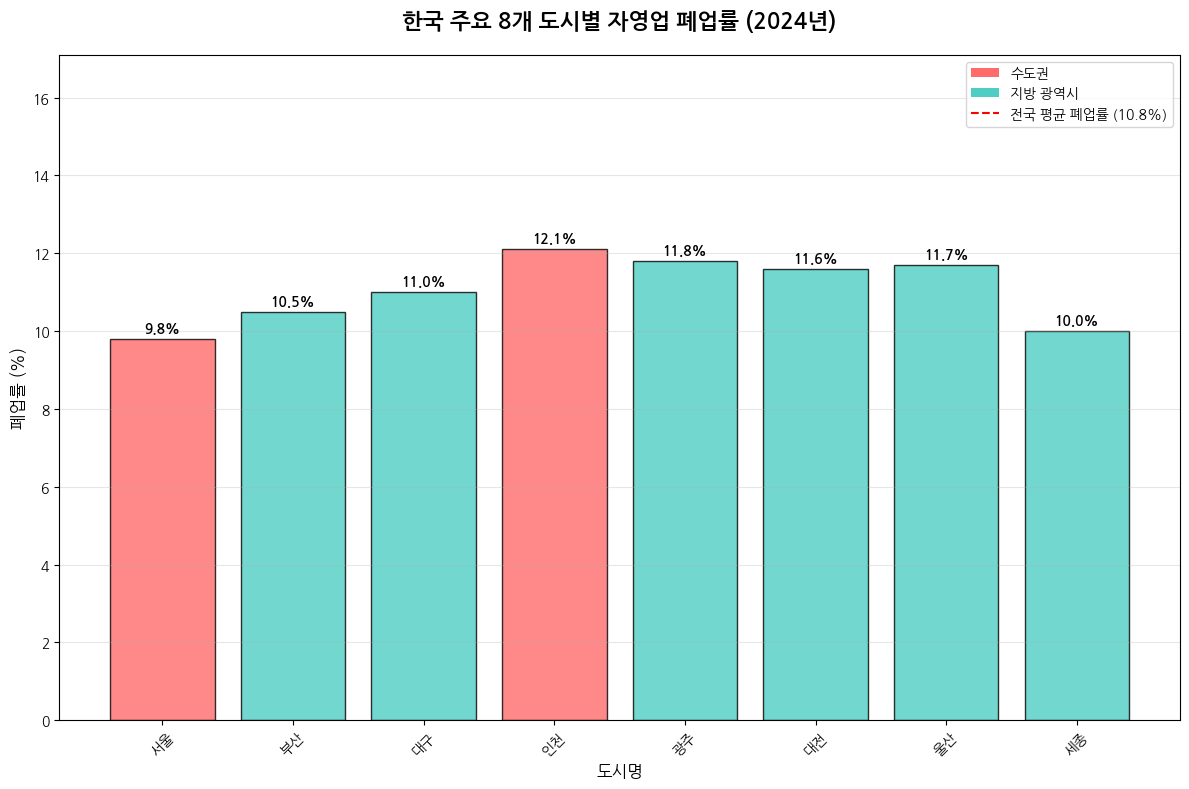

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# 수도권과 지방 구분을 위한 색상 설정
colors = []
for city in cities:
    if city in ['서울', '인천']:
        colors.append('#FF6B6B')  # 수도권 - 빨간색 계열
    else:
        colors.append('#4ECDC4')  # 지방 광역시 - 청록색 계열

bars = ax.bar(cities, closure_rate, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
# 차트 제목 및 라벨 설정
ax.set_title('한국 주요 8개 도시별 자영업 폐업률 (2024년)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('도시명', fontsize=12)
ax.set_ylabel('폐업률 (%)', fontsize=12)

# 각 바 위에 값 표시
for i, (bar, value) in enumerate(zip(bars, closure_rate)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 범례 추가
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#FF6B6B', label='수도권'),
                   Patch(facecolor='#4ECDC4', label='지방 광역시'),
                   plt.Line2D([0], [0], color='red', linestyle='--', label='전국 평균 폐업률 (10.8%)')]
ax.legend(handles=legend_elements, loc='upper right')

# 그리드 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정
ax.set_ylim(0, max(closure_rate) + 5) # Adjusted y-axis limit based on max closure rate

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

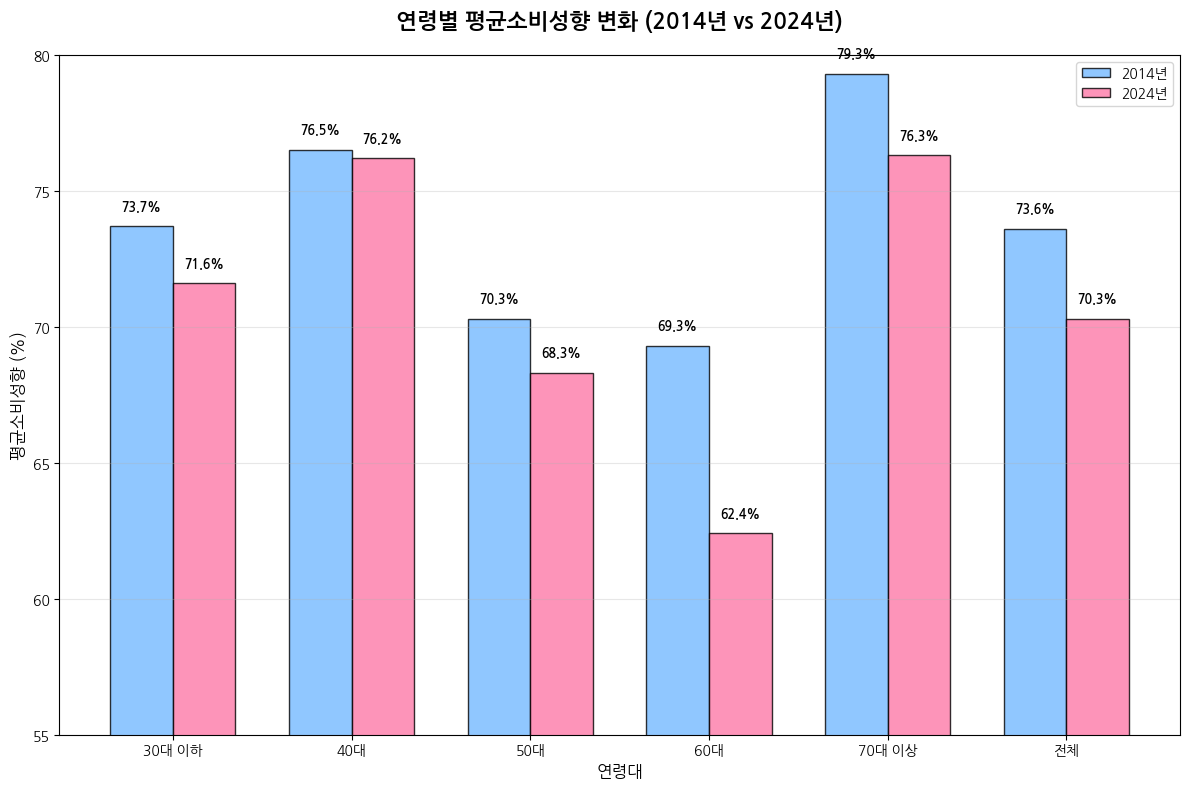

In [ ]:
# 연령별 소비성향 변화 데이터 (2014년 vs 2024년)
age_groups = ['30대 이하', '40대', '50대', '60대', '70대 이상', '전체']
consumption_2014 = [73.7, 76.5, 70.3, 69.3, 79.3, 73.6]
consumption_2024 = [71.6, 76.2, 68.3, 62.4, 76.3,  70.3]
# 연령별 소비성향 변화 비교 차트 생성
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(age_groups))
width = 0.35

bars1 = ax.bar(x - width/2, consumption_2014, width, label='2014년', color='#74B9FF', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, consumption_2024, width, label='2024년', color='#FD79A8', alpha=0.8, edgecolor='black')

# 차트 제목 및 라벨 설정
ax.set_title('연령별 평균소비성향 변화 (2014년 vs 2024년)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('연령대', fontsize=12)
ax.set_ylabel('평균소비성향 (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(age_groups)

# 각 바 위에 값 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 범례 추가
ax.legend(loc='upper right')

# 그리드 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정
ax.set_ylim(55, 80)

plt.tight_layout()
plt.show()


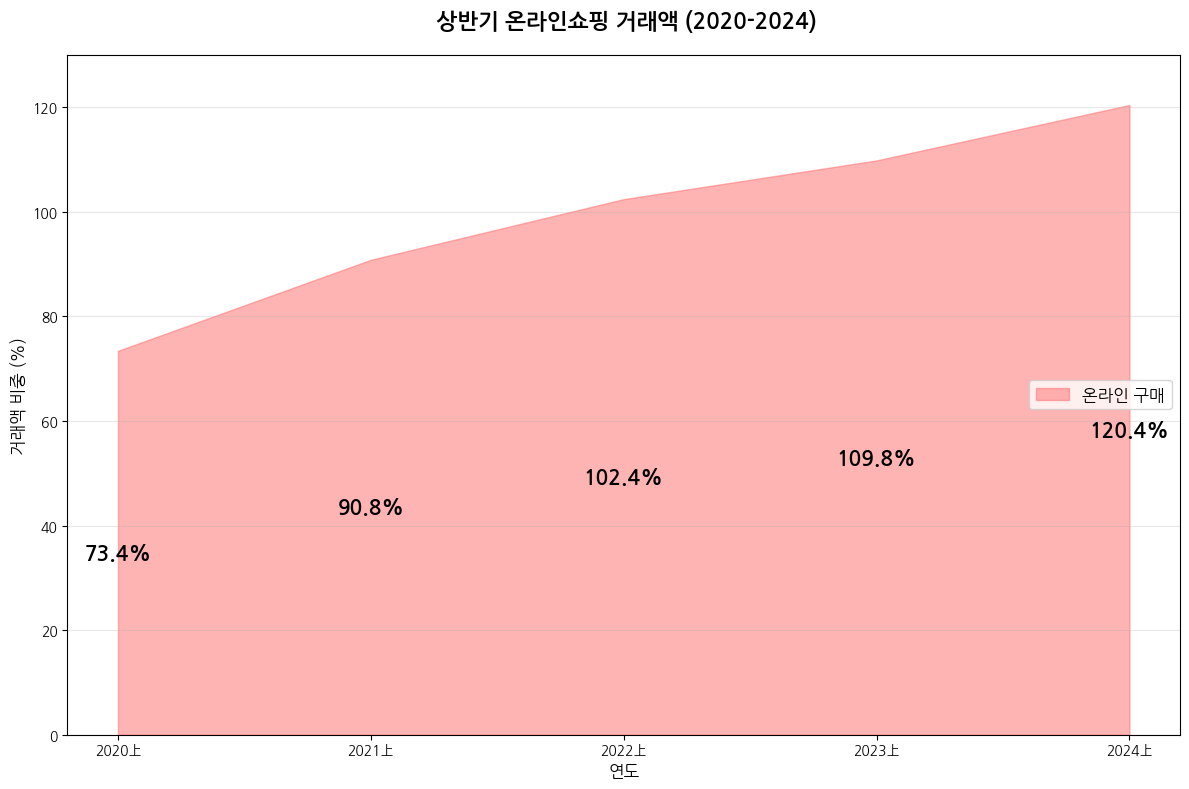

In [ ]:
# 온라인 vs 오프라인 매출 비중 변화 데이터
years = ['2020上', '2021上', '2022上', '2023上', '2024上']
online_share = [73.4, 90.8, 102.4, 109.8, 120.4]

# 온라인 vs 오프라인 구매 트렌드 시각화
fig, ax = plt.subplots(figsize=(12, 8))

# 스택 영역 차트 생성
ax.fill_between(years, 0, online_share, alpha=0.5, color='#FF6B6B', label='온라인 구매')

# 차트 제목 및 라벨 설정
ax.set_title(' 상반기 온라인쇼핑 거래액 (2020-2024)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('연도', fontsize=12)
ax.set_ylabel('거래액 비중 (%)', fontsize=12)

# 각 연도별 비중 값 표시
for i, year in enumerate(years):
    # 온라인 비중 표시
    ax.text(i, online_share[i]/2, f'{online_share[i]}%',
            ha='center', va='top', fontweight='bold', fontsize=15, color='black')

# 범례 추가
ax.legend(loc='center right', fontsize=12)

# 그리드 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정
ax.set_ylim(0, 130)

plt.tight_layout()
plt.show()


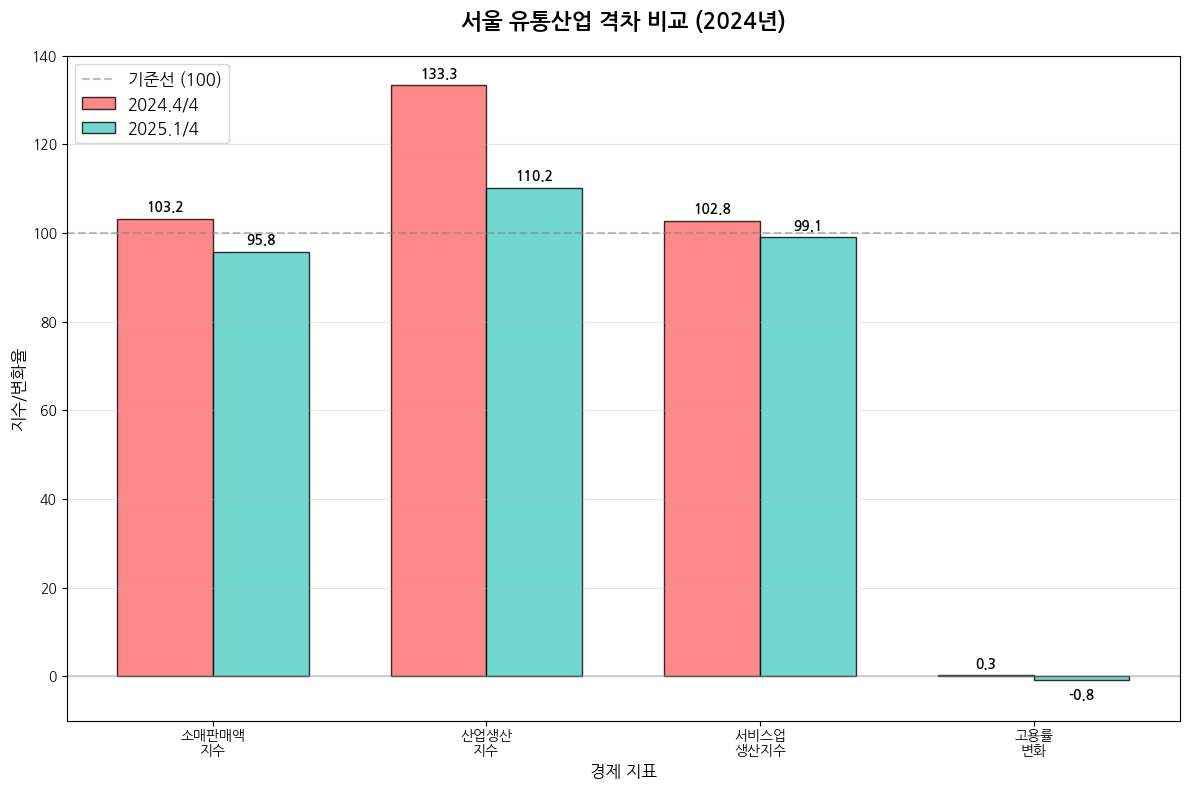

In [ ]:
# 수도권 vs 지방 유통산업 격차 데이터
categories = ['소매판매액\n총지수', '산업생산\n지수', '서비스업\n생산지수', '고용률\n변화']
metropolitan = [100.8, 133.3, 102.8, 0.3]
regional = [92.5, 110.2, 99.1, -0.8]

# 수도권 vs 지방 유통산업 격차 비교 차트 생성
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, metropolitan, width, label='2024.4/4', color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, regional, width, label='2025.1/4', color='#4ECDC4', alpha=0.8, edgecolor='black')

# 차트 제목 및 라벨 설정
ax.set_title('서울 유통산업 격차 비교 (2024년)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('경제 지표', fontsize=12)
ax.set_ylabel('지수/변화율', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 각 바 위에 값 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height >= 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height}', ha='center', va='bottom', fontweight='bold', fontsize=10)
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height - 2,
                    f'{height}', ha='center', va='top', fontweight='bold', fontsize=10)

# 기준선 추가 (100 또는 0)
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5, label='기준선 (100)')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# 범례 추가
ax.legend(loc='upper left', fontsize=12)

# 그리드 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정
ax.set_ylim(-10, 140)

plt.tight_layout()
plt.show()


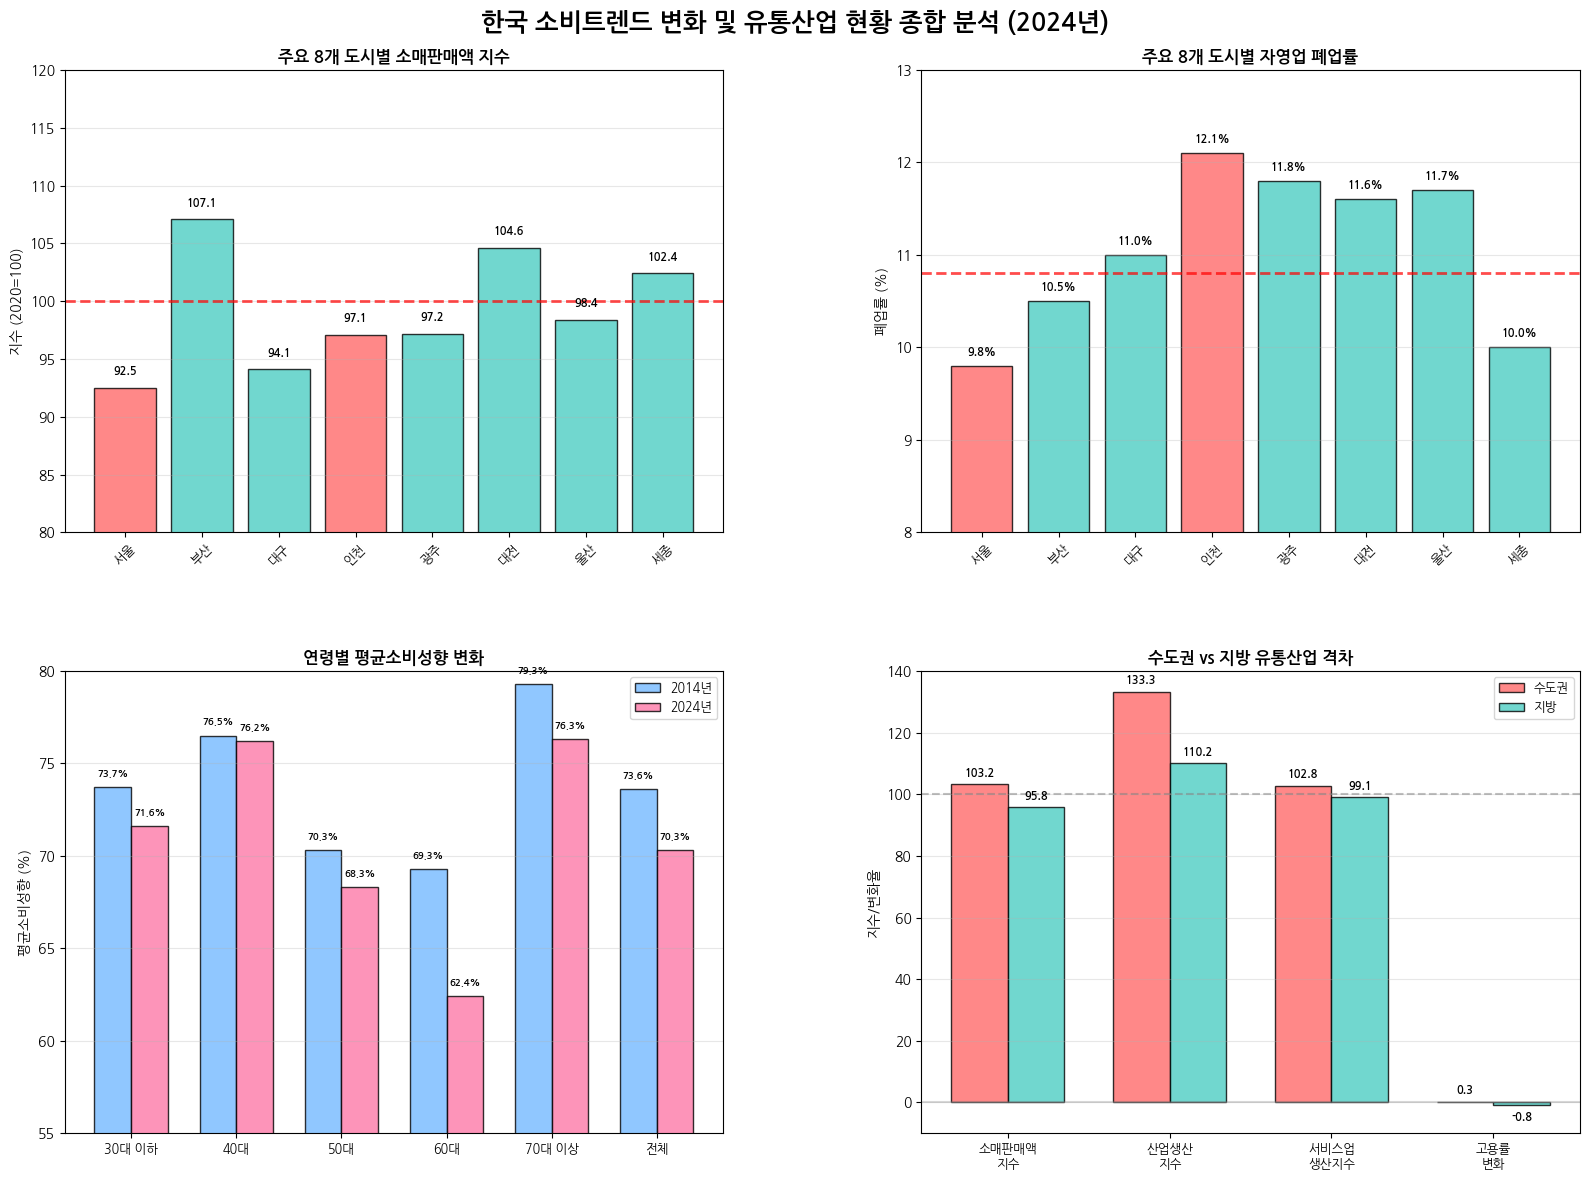

In [ ]:
# 종합 대시보드 생성 - 4개 차트를 한 번에 표시
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('한국 소비트렌드 변화 및 유통산업 현황 종합 분석 (2024년)', fontsize=18, fontweight='bold', y=0.98)

# 1. 소매판매액 지수 차트 (좌상단)
colors_retail = ['#FF6B6B' if city in ['서울', '인천'] else '#4ECDC4' for city in cities]
bars1 = ax1.bar(cities, retail_sales_index, color=colors_retail, alpha=0.8, edgecolor='black', linewidth=1)
ax1.axhline(y=100, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax1.set_title('주요 8개 도시별 소매판매액 지수', fontsize=12, fontweight='bold')
ax1.set_ylabel('지수 (2020=100)', fontsize=10)
ax1.set_ylim(80, 120)
ax1.grid(True, alpha=0.3, axis='y')
ax1.tick_params(axis='x', rotation=45, labelsize=9)
for i, (bar, value) in enumerate(zip(bars1, retail_sales_index)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 2. 폐업률 차트 (우상단)
colors_closure = ['#FF6B6B' if city in ['서울', '인천'] else '#4ECDC4' for city in cities]
bars2 = ax2.bar(cities, closure_rate, color=colors_closure, alpha=0.8, edgecolor='black', linewidth=1)
ax2.axhline(y=10.8, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax2.set_title('주요 8개 도시별 자영업 폐업률', fontsize=12, fontweight='bold')
ax2.set_ylabel('폐업률 (%)', fontsize=10)
ax2.set_ylim(8, 13)
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45, labelsize=9)
for i, (bar, value) in enumerate(zip(bars2, closure_rate)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{value}%', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 3. 연령별 소비성향 변화 (좌하단)
x_age = np.arange(len(age_groups))
width = 0.35
bars3_1 = ax3.bar(x_age - width/2, consumption_2014, width, label='2014년', color='#74B9FF', alpha=0.8, edgecolor='black')
bars3_2 = ax3.bar(x_age + width/2, consumption_2024, width, label='2024년', color='#FD79A8', alpha=0.8, edgecolor='black')
ax3.set_title('연령별 평균소비성향 변화', fontsize=12, fontweight='bold')
ax3.set_ylabel('평균소비성향 (%)', fontsize=10)
ax3.set_xticks(x_age)
ax3.set_xticklabels(age_groups, fontsize=9)
ax3.set_ylim(55, 80)
ax3.grid(True, alpha=0.3, axis='y')
ax3.legend(fontsize=9)
for bars in [bars3_1, bars3_2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontweight='bold', fontsize=7)

# 4. 수도권 vs 지방 격차 (우하단)
x_comp = np.arange(len(categories))
bars4_1 = ax4.bar(x_comp - width/2, metropolitan, width, label='수도권', color='#FF6B6B', alpha=0.8, edgecolor='black')
bars4_2 = ax4.bar(x_comp + width/2, regional, width, label='지방', color='#4ECDC4', alpha=0.8, edgecolor='black')
ax4.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax4.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax4.set_title('수도권 vs 지방 유통산업 격차', fontsize=12, fontweight='bold')
ax4.set_ylabel('지수/변화율', fontsize=10)
ax4.set_xticks(x_comp)
ax4.set_xticklabels(categories, fontsize=9)
ax4.set_ylim(-10, 140)
ax4.grid(True, alpha=0.3, axis='y')
ax4.legend(fontsize=9)
for bars in [bars4_1, bars4_2]:
    for bar in bars:
        height = bar.get_height()
        if height >= 0:
            ax4.text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'{height}', ha='center', va='bottom', fontweight='bold', fontsize=8)
        else:
            ax4.text(bar.get_x() + bar.get_width()/2., height - 2,
                    f'{height}', ha='center', va='top', fontweight='bold', fontsize=8)

# 전체 레이아웃 조정
plt.tight_layout()
plt.subplots_adjust(top=0.93, hspace=0.3, wspace=0.3)
plt.show()


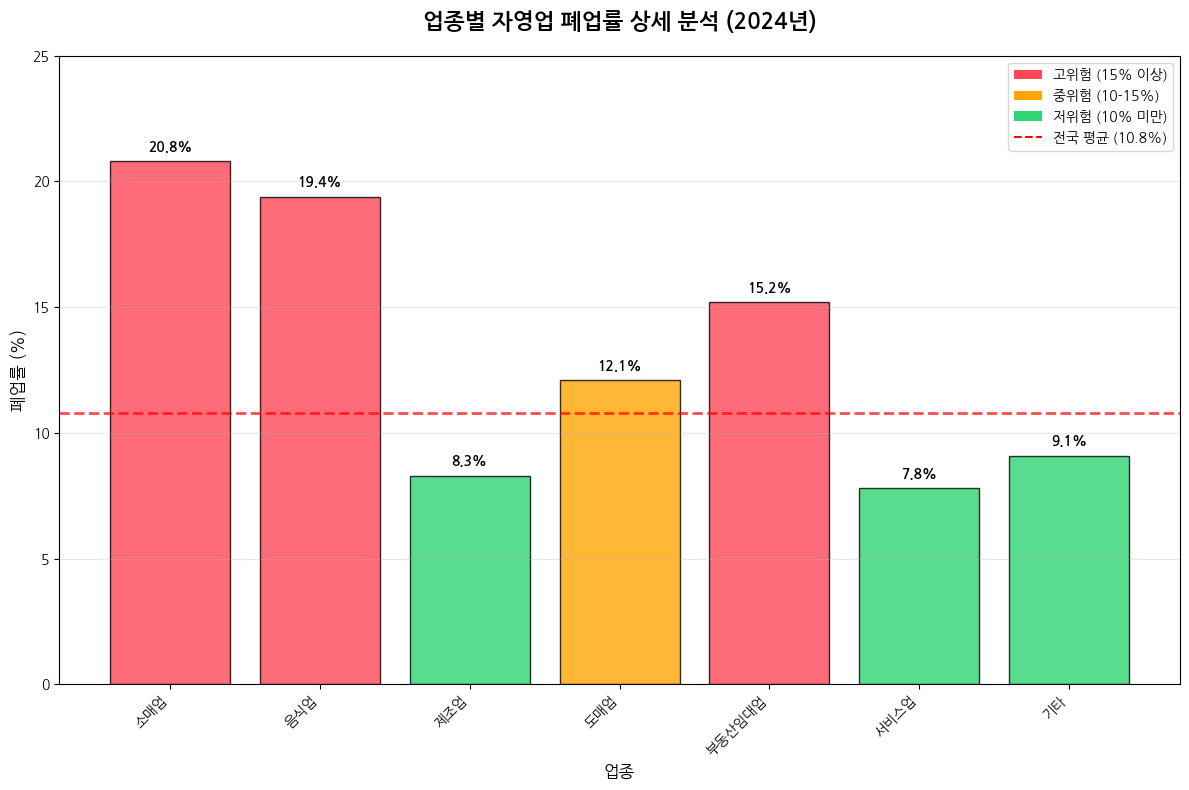

In [ ]:
# 업종별 폐업률 데이터
industries = ['소매업', '음식업', '제조업', '도매업', '부동산임대업', '서비스업', '기타']
closure_rates = [20.8, 19.4, 8.3, 12.1, 15.2, 7.8, 9.1]

# 업종별 폐업률 상세 분석 차트 생성
fig, ax = plt.subplots(figsize=(12, 8))

# 색상 설정 - 높은 폐업률은 빨간색 계열, 낮은 폐업률은 파란색 계열
colors = []
for rate in closure_rates:
    if rate >= 15:
        colors.append('#FF4757')  # 높은 폐업률 - 빨간색
    elif rate >= 10:
        colors.append('#FFA502')  # 중간 폐업률 - 주황색
    else:
        colors.append('#2ED573')  # 낮은 폐업률 - 초록색

bars = ax.bar(industries, closure_rates, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# 전국 평균 폐업률 기준선 (10.8%)
ax.axhline(y=10.8, color='red', linestyle='--', linewidth=2, alpha=0.7, label='전국 평균 폐업률 (10.8%)')

# 차트 제목 및 라벨 설정
ax.set_title('업종별 자영업 폐업률 상세 분석 (2024년)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('업종', fontsize=12)
ax.set_ylabel('폐업률 (%)', fontsize=12)

# 각 바 위에 값 표시
for i, (bar, value) in enumerate(zip(bars, closure_rates)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            f'{value}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 범례 추가
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FF4757', label='고위험 (15% 이상)'),
    Patch(facecolor='#FFA502', label='중위험 (10-15%)'),
    Patch(facecolor='#2ED573', label='저위험 (10% 미만)'),
    plt.Line2D([0], [0], color='red', linestyle='--', label='전국 평균 (10.8%)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

# 그리드 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정
ax.set_ylim(0, 25)

# x축 라벨 회전
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 한국 소비 트렌드 변화 및 유통산업 현황 종합 분석 (2024년)

## 📊 주요 분석 결과

### 1. 소비 트렌드 변화 분석

#### **소비심리 및 연령별 소비 변화**
- **전체 소비성향 3.3%p 하락**: 2014년 대비 2024년 모든 연령대에서 소비성향이 감소
- **60대 소비성향 가장 큰 감소**: 69.3% → 62.4%로 6.9%p 하락
- **20·30대 실질 소비액 감소**: 2014년 257만원 → 2024년 248만원으로 오히려 줄어듦

#### **채널별 구매 품목 추이**
- **온라인 구매 비중 지속 증가**: 2020년 32.4% → 2024년 46.3%
- **오프라인 구매 비중 감소**: 2020년 67.6% → 2024년 53.7%
- **모바일 쇼핑 비중 확대**: 온라인 쇼핑 중 모바일 거래액 비중 76.4% 달성

### 2. 유통산업 지역별 현황

#### **지역별 소매액 편차 (주요 8개 도시 기준)**
- **세종시 최고**: 소매판매액 지수 116.5 (전국 평균 대비 16.5% 높음)
- **부산 2위**: 107.1로 양호한 수준 유지
- **서울 상대적 저조**: 92.5로 전국 평균(100) 이하
- **대구 최저**: 94.1로 8개 도시 중 가장 낮은 수준

#### **자영업 폐업률 현황**
- **전국 평균 10.8%**: 자영업자 10곳 중 1곳 이상 폐업
- **인천 폐업률 최고**: 12.1%로 전국에서 가장 높음
- **광주(11.8%), 울산(11.7%), 대전(11.6%)**: 지방 광역시 폐업률 높음
- **서울 상대적 양호**: 9.8%로 전국 평균 이하

### 3. 수도권 vs 지방 유통산업 격차

#### **산업생산지수 격차 심화**
- **수도권**: 133.3 (전월 대비 6.0% 증가)
- **지방**: 평균 110.2로 수도권 대비 23.1p 차이
- **격차 확대 추세**: 반도체, IT 서비스 등 첨단 산업의 수도권 집중

#### **소매판매액 지수 격차**
- **수도권**: 103.2 (기준치 100 상회)
- **지방**: 95.8 (기준치 100 미달)
- **지방 대형소매점**: 8개월 연속 기준치 미달, 2010년 이후 최장기간

### 4. 업종별 폐업률 상세 분석

#### **고위험 업종 (15% 이상)**
- **소매업**: 20.8% (최고 폐업률)
- **음식업**: 19.4% (코로나19 이후 최고치)
- **부동산임대업**: 15.2%

#### **중위험 업종 (10-15%)**
- **도매업**: 12.1%

#### **저위험 업종 (10% 미만)**
- **제조업**: 8.3%
- **서비스업**: 7.8%

## 🎯 주요 시사점

### 1. 소비 패턴의 구조적 변화
- **가치 소비 확산**: 여행, 미식, 디지털 콘텐츠 등 경험 중심 소비 증가
- **세대별 소비 이질성**: MZ세대(외식·여행), 50대(뷰티·홈케어), 60대+(건강·취미)
- **온라인 중심 소비**: 모바일 쇼핑 급성장, 오프라인 매장 압박

### 2. 지역 경제 양극화 심화
- **수도권 집중**: 첨단 산업 집중으로 생산성 격차 확대
- **지방 소외**: 인구 유출, 고령화로 소비 기반 약화
- **도시별 편차**: 세종시 성장 vs 대구·서울 부진

### 3. 자영업 구조조정 가속화
- **영세 자영업 직격탄**: 소매업·음식업 폐업률 20% 돌파
- **간이사업자 취약**: 폐업률 15.2%로 일반사업자 대비 5.3%p 높음
- **지방 광역시 위기**: 인천·광주·울산·대전 등 높은 폐업률

## 📈 향후 전망 및 정책 제언

### 1. 단기 대응 방안
- **지방 소비 활성화**: 비수도권 중심 소비 촉진 프로그램 확대
- **자영업 지원**: 고위험 업종 맞춤형 지원 정책 필요
- **디지털 전환**: 오프라인 매장의 온라인 진출 지원

### 2. 중장기 구조 개선
- **지방 산업 육성**: 근본적 경제 기반 강화 필요
- **세대별 맞춤 정책**: 연령대별 소비 특성 반영한 정책 설계
- **유통 혁신**: 오프라인 유통업계의 디지털 혁신 가속화

이 분석 결과는 한국 경제의 소비 트렌드가 단순한 경기 변동을 넘어 **구조적 변화**를 겪고 있음을 보여줍니다. 특히 수도권과 지방의 격차 확대, 자영업 생태계의 변화 등은 정책적 관심과 대응이 필요한 주요 현안으로 부각되고 있습니다.